#Introduction to Convolutional Neural network and computer network with Tensorflow

Computer vision is practice of writing algorithm which can discover in patterns in visual data. Such as camera of a self-driving car recognizing the car infront.

##Get the data

The images we are working with are from the Food101 dataset (101 different classes of food):

However we modify it to only use two classes (pizza and steak)

**Note**: We start with a smaller dataset so we can experiment quickly and figure out what work (or better yet what doesn't work) before scaling up

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-01-22 03:49:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.170.207, 173.194.174.207, 74.125.23.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  24.0MB/s    in 5.3s    

2025-01-22 03:50:03 (19.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Inspect data (become one with it)

A very crucial step at the begining of any machine learning project is becoming one with the data.

And for computer vision project... this usually means visualize many sample of your data

In [ ]:
! ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [2]:
import os

#walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} image in '{dirpath}'")

There are 2 directories and 0 image in 'pizza_steak'
There are 2 directories and 0 image in 'pizza_steak/test'
There are 0 directories and 250 image in 'pizza_steak/test/pizza'
There are 0 directories and 250 image in 'pizza_steak/test/steak'
There are 2 directories and 0 image in 'pizza_steak/train'
There are 0 directories and 750 image in 'pizza_steak/train/pizza'
There are 0 directories and 750 image in 'pizza_steak/train/steak'


In [ ]:
#Some time .DS_store file may show neglest it
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jan 21 09:47 .
drwxr-xr-x 1 root root 4096 Jan 21 09:47 ..
drwxr-xr-x 4 root root 4096 Jan 21 09:47 test
drwxr-xr-x 4 root root 4096 Jan 21 09:47 train


In [ ]:
#Another way to find how many images are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programatically.


In [3]:
#Get the class name programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #create list of class names from the subdirectories
#If there is Ds_store use class_names = class_names[1:]
print(class_names)


['pizza' 'steak']


In [2]:
#Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Set up the target directory(We'll view images from here)
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder +"/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #show the shape of the image

  return img


['3546278.jpg']
Image shape: (512, 289, 3)


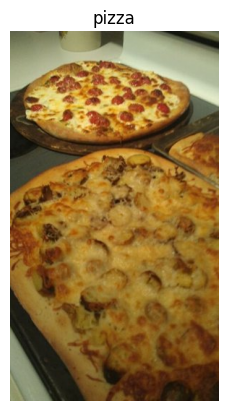

In [ ]:
#View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")



In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 80,  49,  21],
        [ 78,  47,  19],
        [ 76,  45,  16],
        ...,
        [161, 109,  70],
        [160, 108,  69],
        [163, 111,  72]],

       [[ 77,  46,  18],
        [ 78,  47,  19],
        [ 78,  47,  18],
        ...,
        [161, 109,  70],
        [160, 108,  69],
        [164, 112,  73]],

       [[ 75,  44,  16],
        [ 77,  46,  18],
        [ 79,  48,  20],
        ...,
        [160, 108,  68],
        [160, 108,  68],
        [164, 112,  72]],

       ...,

       [[ 91,  64,  53],
        [ 95,  68,  57],
        [ 97,  70,  59],
        ...,
        [130,  97,  80],
        [132,  99,  82],
        [127,  94,  77]],

       [[ 95,  68,  57],
        [ 96,  69,  58],
        [ 99,  72,  61],
        ...,
        [129,  96,  81],
        [131,  98,  83],
        [127,  94,  79]],

       [[ 95,  68,  57],
        [ 95,  68,  57],
        [ 98,  71,  60],
        ...,
        [127,  94,  7

In [ ]:
#View the image shape
img.shape #return width height and color channel

(512, 384, 3)

In [ ]:
#Get all pixel values between 0 and 1
img/225

array([[[0.35555556, 0.21777778, 0.09333333],
        [0.34666667, 0.20888889, 0.08444444],
        [0.33777778, 0.2       , 0.07111111],
        ...,
        [0.71555556, 0.48444444, 0.31111111],
        [0.71111111, 0.48      , 0.30666667],
        [0.72444444, 0.49333333, 0.32      ]],

       [[0.34222222, 0.20444444, 0.08      ],
        [0.34666667, 0.20888889, 0.08444444],
        [0.34666667, 0.20888889, 0.08      ],
        ...,
        [0.71555556, 0.48444444, 0.31111111],
        [0.71111111, 0.48      , 0.30666667],
        [0.72888889, 0.49777778, 0.32444444]],

       [[0.33333333, 0.19555556, 0.07111111],
        [0.34222222, 0.20444444, 0.08      ],
        [0.35111111, 0.21333333, 0.08888889],
        ...,
        [0.71111111, 0.48      , 0.30222222],
        [0.71111111, 0.48      , 0.30222222],
        [0.72888889, 0.49777778, 0.32      ]],

       ...,

       [[0.40444444, 0.28444444, 0.23555556],
        [0.42222222, 0.30222222, 0.25333333],
        [0.43111111, 0

#An end to end example

Let's build convolutional neural network to find patterns in our image, more specificall we need a way to:

* Load our images
* Preprocess of our images
* Build a CNN to find patterns in our images
* Compile the CNN
* Fit the CNN to our training Data



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixel value between 0 & 1 also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Set up path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir ="pizza_steak/test"


#Import data from directories and turn in to batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed =42)

#Build a CNN model(this is the same as Tiny VGG on the CNN explainer website)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps= len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.6209 - loss: 0.6266 - val_accuracy: 0.8320 - val_loss: 0.4252
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.7701 - loss: 0.4697 - val_accuracy: 0.8400 - val_loss: 0.3823
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.8454 - loss: 0.3824 - val_accuracy: 0.8620 - val_loss: 0.3526


If the above cell is taking longer than 10 seconds epochs, make sure you are using GPUs.
Runtime-> Change the RuntimeType-> Hardware accelaerator-> GPU
(You may have to rerun some cells above)

In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixel value between 0 & 1 also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Set up path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir ="pizza_steak/test"


#Import data from directories and turn in to batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed =42)

#Build a CNN model(this is the same as Tiny VGG on the CNN explainer website)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size=3,
                           activation="relu",
                          ),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    validation_data=valid_data
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 209ms/step - accuracy: 0.5259 - loss: 0.6799 - val_accuracy: 0.7160 - val_loss: 0.5376
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.7616 - loss: 0.5010 - val_accuracy: 0.7900 - val_loss: 0.4276
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.7995 - loss: 0.4312 - val_accuracy: 0.8520 - val_loss: 0.3621
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.8112 - loss: 0.4068 - val_accuracy: 0.8580 - val_loss: 0.3449
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.8413 - loss: 0.3617 - val_accuracy: 0.8780 - val_loss: 0.3117


In [ ]:
model_1.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_81 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

Note:

Practise exercise go through the CNN explainer website for a minimum of 10 minutes and compare our neural network

##Use the same model as before

Lets replicate model we've built in previous section to see if it works with our image data.

The model we are building is from the tensorflow playground:


In [ ]:
import tensorflow as tf
#Set random seed
tf.random.set_seed(42)

#Create a model to replicate the tensorflow model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_2.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics =["accuracy"]
)

history_2 = model_2.fit(train_data, epochs=5,
                        validation_data=valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.5285 - loss: 1.0868 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.5157 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
#Get the summary of model 2
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it


In [ ]:
#Set the random seed
tf.random.set_seed(42)

#Create the model(same as above but let's step it up a notch)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_3 = model_3.fit(train_data, epochs=5, validation_data=valid_data)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.5857 - loss: 5.9611 - val_accuracy: 0.7720 - val_loss: 0.5072
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.6712 - loss: 0.8928 - val_accuracy: 0.7060 - val_loss: 0.6185
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.7260 - loss: 0.6318 - val_accuracy: 0.7440 - val_loss: 0.5913
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.7687 - loss: 0.5125 - val_accuracy: 0.7900 - val_loss: 0.5233
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.7227 - loss: 0.7764 - val_accuracy: 0.6200 - val_loss: 1.4642


In [ ]:
#Get a summary of model_3
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

##Binary classification: Let's break it down

1. Become one with data (visualize, visualize, visualize)
2. Preprocess the data ( preppare it for our model, the main steps here was scaling/ normalizing
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust the different parameter and improve the model (try to beat our baseline)
7. Repeat until satisfy



### 1. Become one with data

['290850.jpg']
Image shape: (384, 512, 3)
['717350.jpg']
Image shape: (512, 512, 3)


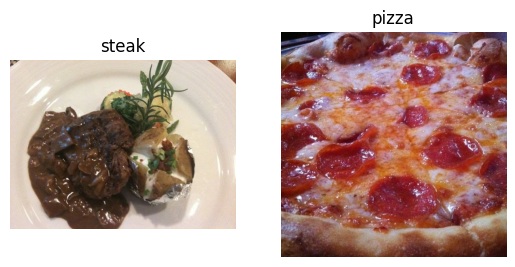

In [ ]:
#Visualize data
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the model (prepare it for a model)


In [5]:
#Define directory path

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to train our data in to **batches**

A batch is a smal subset of data. Rather than look all 10,000 images at one time model might only look at 32 at a time.

It does this for couple of reasons:
1. 10, 000 images or more not might fit for the memory of your processor GPU
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

why 32?

Because 32 is good not more when more give errors



In [ ]:
!nvidia-smi

Tue Jan 21 05:05:44 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0              30W /  70W |   1715MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale =1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


In [8]:
#Load in our image data from our directory and turn them in to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode="binary", #type of data you are working with
                                               batch_size =32) #size of mini batches to load data into

test_data =test_datagen.flow_from_directory(directory= test_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get sample of training data batches
images, labels = next(train_data)  # Get the next batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
#How many batches are there
len(train_data)

47

In [ ]:
1500/32 #we have 1500 trainig images divide by 32

46.875

In [ ]:
#Get the first two images
images[:2], images[0].shape

(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

In [ ]:
#View the first batch of the labels
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a Baseline)

Baseline is a relatively small model or existing result that you step when begining a machine learn experiment and then as you keep experimenting, you try to beat baseline.

Note: In deep learning, there is almost infinite amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it work with your data and then introduce the complexity as required. (ex: look at which current model is performing best in the field for your problem)

In [9]:
#Making creating of our model is little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Create the model (this will be our baseline, layer convolutional neural network)
model_4 =Sequential([
    Conv2D(filters=10, #filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=(3,3), #the size of the slicing window going across input
           strides=1, #the seize of the step sliding window take across input
           padding="valid",# If same, output shape is same as input shape, if 'valid' output shape get compressed
           activation="relu",
           input_shape=(224,224,3)), #Input layer (specify input shape)
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") #output layer (working with binary classification)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the model
model_4.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

In [ ]:
model_4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

###Fit the model

In [ ]:
#Check the lengths of training and test data geneartors
len(train_data), len(test_data)

(47, 16)

In [ ]:
#Fit the model
history_4 = model_4.fit(  #This is combination of labels and sample data
    train_data,
    epochs=5,
    validation_data=test_data
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9928 - loss: 0.0488

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.9927 - loss: 0.0490 - val_accuracy: 0.7780 - val_loss: 0.6177
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.9961 - loss: 0.0281 - val_accuracy: 0.8060 - val_loss: 0.7085
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.9940 - loss: 0.0252 - val_accuracy: 0.7680 - val_loss: 0.8017
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.9956 - loss: 0.0179 - val_accuracy: 0.7940 - val_loss: 0.6921
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.7900 - val_loss: 0.7780


### 5.Evaluating our model

It looks like model is learning something let's evaluate it.

<Axes: >

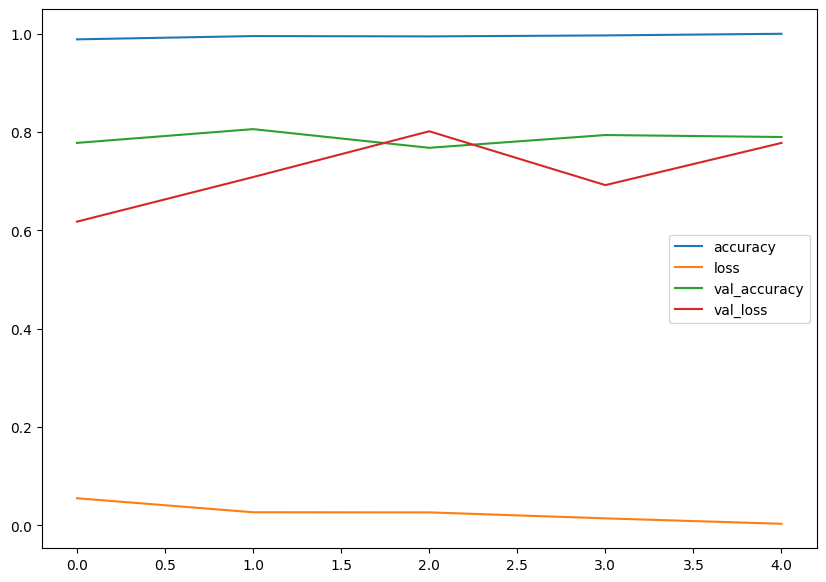

In [ ]:
#Let's plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [21]:
#Plot the validation and training curves seperately
def plot_loss_curves(history):
  #Returns seperate loss curves for training and validation metrics

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot the loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:**

When a model validation loss start to **increase ** it's likely that model is **overfitting** the training dataset. This meaninng its learning patterns in the training dataset too well and thus the model ability to generalize unseen data will be diminsished.

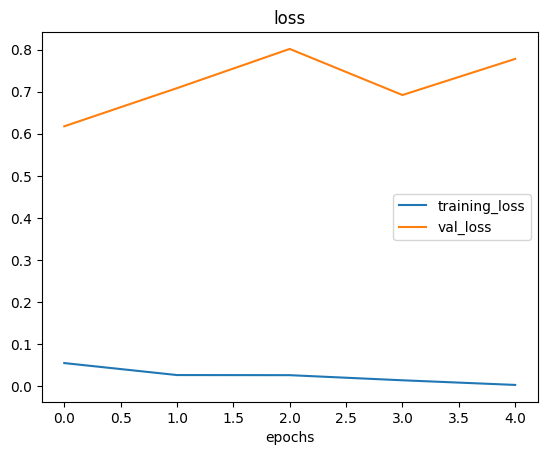

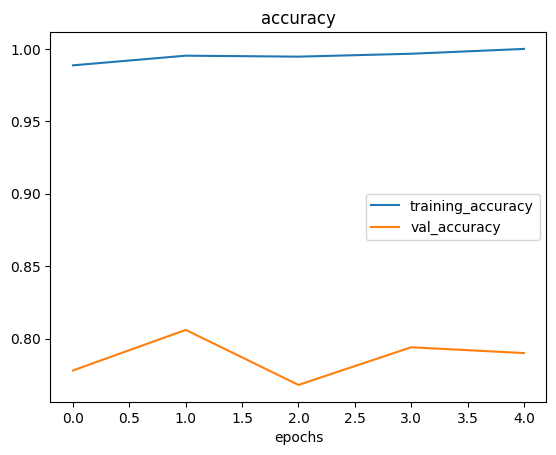

In [ ]:
#Check loss and accuracy of model_4
plot_loss_curves(history_4)

###6. Adjust the model parameter

Fitting a machine learning model comes in three steps:

0. Create a baseline
1. Beat the baseline by overfitting the larger model
2. Reduce the overfitting

Ways to induce the overfitting

* Increase number of conv layers
* Increase number of conv filters
* Add another dense layer to the output of our flatten layer

Reduce overfitting

* Add data augmentation
* Add regularization layers
* Add more data


**Note**: Reducing overfitting also known as **Regualrization**


In [ ]:
model_5 = Sequential([
    Conv2D(10,3, activation="relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")

])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

In [ ]:
#Fit the model
history_5 = model_5.fit(
    train_data,
    epochs =5,
    validation_data= test_data
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5625 - loss: 0.6712 - val_accuracy: 0.6620 - val_loss: 0.5749
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7601 - loss: 0.4880 - val_accuracy: 0.7860 - val_loss: 0.4395
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8061 - loss: 0.4290 - val_accuracy: 0.8500 - val_loss: 0.3432
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.8350 - loss: 0.3837 - val_accuracy: 0.8120 - val_loss: 0.3923
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8355 - loss: 0.3807 - val_accuracy: 0.8740 - val_loss: 0.3156


In [ ]:
#Get a summary of our model with max poooling
model_5.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

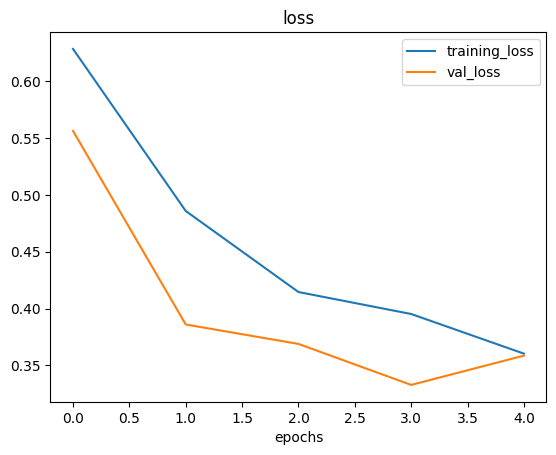

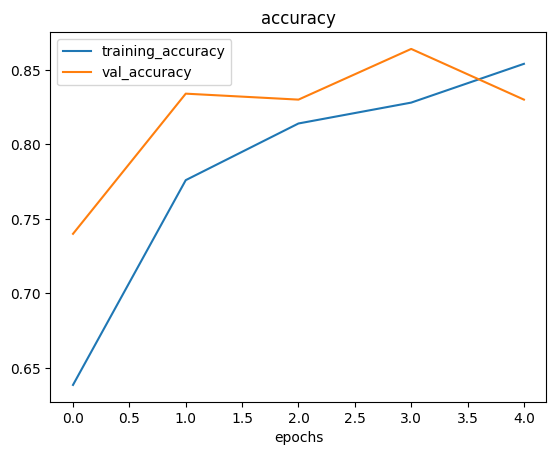

In [ ]:
#plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding our data augmentation

In [12]:
#Create Imagedatagenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

#Create Imagedatagenerator without data augmentation
train_datagen = ImageDataGenerator(rescale =1/255.)

#Create ImageDataGeneratoe without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)



**What is data augmentation**

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our model to learn more generalizable (hopefully) patterns and altering might means adjusting the rotation of an image, flipping it , cropping it or something similar.

Let's write some code to visualize the data augmentation

In [13]:
#Imprt data and augmented it from training directory
print("augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size =32,
    class_mode="binary",
    shuffle=False
)#For demonastrational purpose only

print("Non Augmented training data:")

#Create non augmented train data batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size=32,
    class_mode ="binary",
    shuffle = False
)
IMG_SIZE =(224,224)
#Create non-augmented test data batches
print("Non Augmented test data:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size =32,
    class_mode ="binary"

)

augmented training data:
Found 1500 images belonging to 2 classes.
Non Augmented training data:
Found 1500 images belonging to 2 classes.
Non Augmented test data:
Found 500 images belonging to 2 classes.


**Note**:

Data augmentation is usually only performed on the training data. Using ImageDataGenerator built in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded the module

In [ ]:
#Get sample data batches
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented) #Labels are not augmented only data(images)



Showing image number 23


(-0.5, 223.5, 223.5, -0.5)

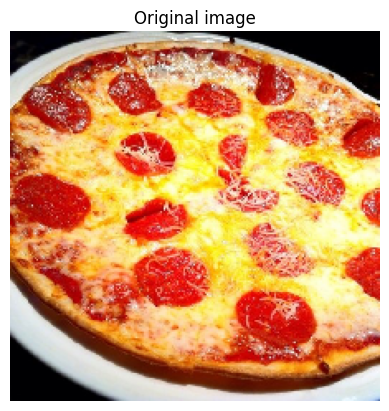

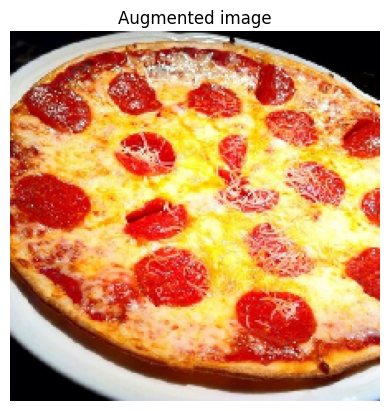

In [ ]:
#Show the originale image and augmented image
import random
random_number = random.randint(0,32)
print(f"Showing image number {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [14]:
#Create model (same as type of model 5)

model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(
    loss="binary_crossentropy",
    optimizer = Adam(),
    metrics =["accuracy"]
)

history_6=model_6.fit(
    train_data_augmented, #fitting model_6 on augmented training data
    epochs=5,
    validation_data = test_data
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.4808 - loss: 0.7373 - val_accuracy: 0.5000 - val_loss: 0.6893
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.4344 - loss: 0.6980 - val_accuracy: 0.6220 - val_loss: 0.6896
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.5155 - loss: 0.6921 - val_accuracy: 0.6880 - val_loss: 0.6826
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.5785 - loss: 0.6882 - val_accuracy: 0.6920 - val_loss: 0.6217
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6082 - loss: 0.7004 - val_accuracy: 0.5160 - val_loss: 0.6901


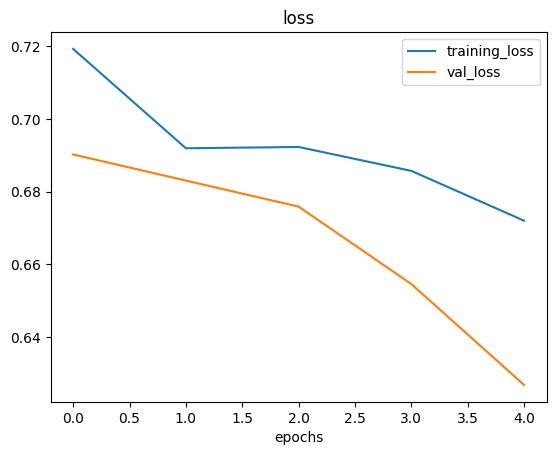

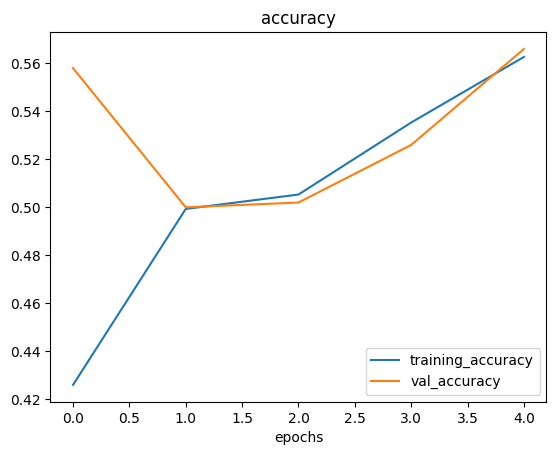

In [ ]:
#Checks our model training curves
plot_loss_curves(history_6)

In [17]:
#Import data and augmented and shuffle it from training directory
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode ="binary",
    batch_size =32,
    shuffle=True
)


Found 1500 images belonging to 2 classes.


In [18]:
model_7 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics =["accuracy"]
)

history_7 = model_7.fit(
    train_data_augmented_shuffle,
    epochs =5,
    validation_data=test_data
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5551 - loss: 0.6759 - val_accuracy: 0.7660 - val_loss: 0.4892
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7332 - loss: 0.5374 - val_accuracy: 0.8260 - val_loss: 0.3932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7631 - loss: 0.4866 - val_accuracy: 0.8680 - val_loss: 0.3553
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7859 - loss: 0.4804 - val_accuracy: 0.8360 - val_loss: 0.3808
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.7811 - loss: 0.4671 - val_accuracy: 0.8780 - val_loss: 0.3327


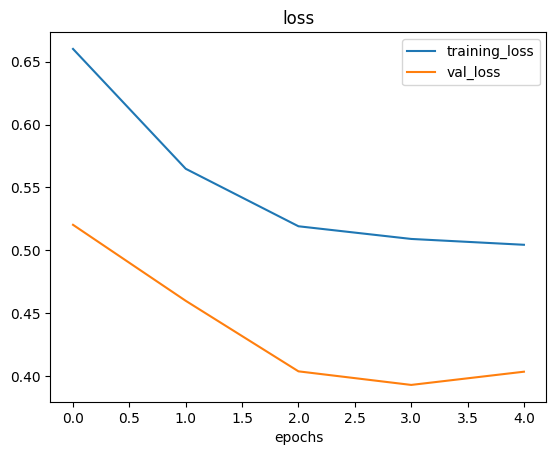

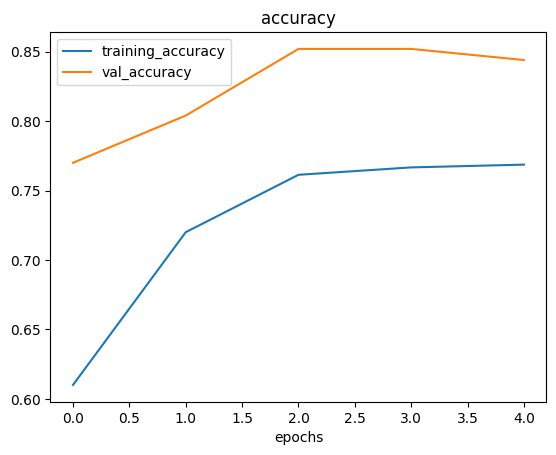

In [ ]:
#Plot the loss curve
plot_loss_curves(history_7)

**Note: **When shiffling training data the model get exposed to all different kind of data during training, thus enabling it to learn features across a wide array of images(in our case pizza and steak at the same time instead of jsut pizza then steak)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are few things we try to continue to improve our model.

* Increase the number of layers(ex conv2d and maxpool2d layers)
* Increase the number of filter(ex- 10 to32)
* Train for longer(more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

#Making prediction with our trained model on our own custom data

In [15]:
#Class we are working with
print(class_names)

['pizza' 'steak']


--2025-01-22 04:16:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  6.63MB/s    in 0.3s    

2025-01-22 04:16:34 (6.63 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

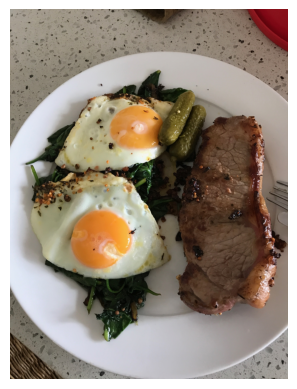

In [22]:
#View our sample images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [23]:
#Check the shape of our image
steak.shape

(4032, 3024, 3)

In [24]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [28]:
import tensorflow as tf
expanded_steak = tf.expand_dims(steak, axis=0)

**Note**: When you are try neural network and you want to make prediction with it on your own custom data.It's important than your custom data or new data is preprocessed in to the same format as the data your model was trained on.

In [32]:
#create a function to import and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  #Reads an image from file name turns in to a tensor and reshape it to (img_shape, colour_channel)
  #Read the image
  img = tf.io.read_file(filename)

  #Decode the read file into tensor
  img = tf.image.decode_image(img)

  #Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  #Rescale the image
  img = img/255.
  return img


In [33]:
#Load and preprocess of our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [41]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.82259196]], dtype=float32)

Looks like our custom image is being put through our model, however it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's predictions

In [35]:
#Remember our selves class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [42]:
#We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [43]:
def pred_and_plot(model, filename, class_names= class_names):
  #Imports an image located at filename, makes a prediction with model and plots the image with predicted class as the title

  #Import the target image and preprocesses it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


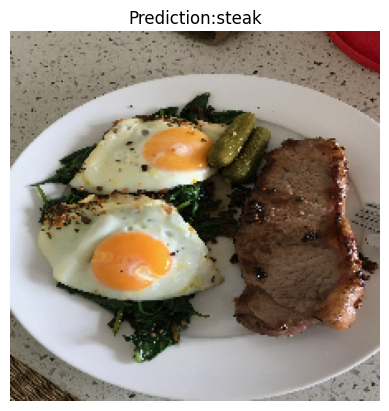

In [44]:
#Test our model with custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2025-01-22 06:58:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  7.49MB/s    in 0.4s    

2025-01-22 06:58:03 (7.49 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


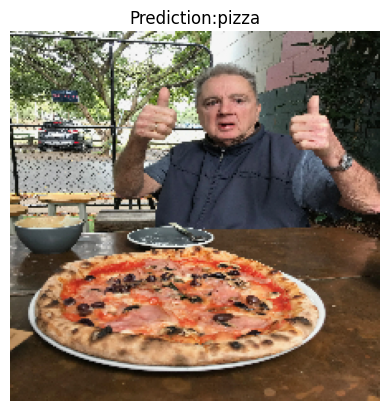

In [45]:
#Download another test custom image this time pizza
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

#Multi class Image classification
We've just been through a bunch of following steps with a binary classification problem. (pizza vs steak), now we are going to steps things up a notch with 10 classes of foods

1. Become one with data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different hyper parameters and improve the model(try to beat baseline/ reduce overfitting)
7. Repeat until satisfied



#1. Import and become one with the data


In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip runtime
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2025-01-22 11:48:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.207, 142.251.163.207, 172.253.115.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  49.1MB/s    in 9.5s    

2025-01-22 11:48:10 (51.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os
#walk through 10 classes of food image data
for dirpath, dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)}, directories and {len(filenames)} images in '{dirpath}'")

There are 2, directories and 0 images in '10_food_classes_all_data'
There are 10, directories and 0 images in '10_food_classes_all_data/train'
There are 0, directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0, directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0, directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0, directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0, directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0, directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0, directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0, directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0, directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0, directories and 750 images in '10_food_classes_all_data/train/chicken_wings'

In [3]:
!ls -la

total 507044
drwxr-xr-x 1 root root      4096 Jan 22 11:17 .
drwxr-xr-x 1 root root      4096 Jan 22 10:40 ..
drwxr-xr-x 4 root root      4096 Jan 22 11:17 10_food_classes_all_data
-rw-r--r-- 1 root root 519183241 Feb 16  2021 10_food_classes_all_data.zip
drwxr-xr-x 4 root root      4096 Jan 17 14:26 .config
drwxr-xr-x 3 root root      4096 Jan 22 11:17 __MACOSX
drwxr-xr-x 1 root root      4096 Jan 17 14:26 sample_data


In [3]:
#Set up train and test directories
train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"

In [4]:
#Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2746102.jpg']
Image shape: (512, 512, 3)


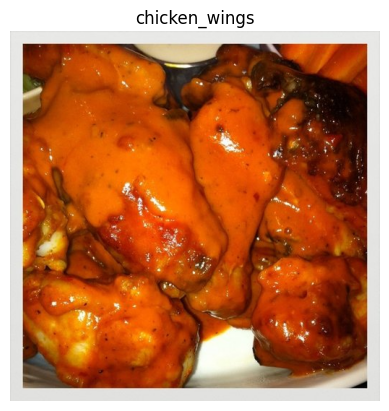

In [13]:
import random

img = view_random_image(target_dir=train_dir,
                        target_class= random.choice(class_names))

###2. Preprocess the data (prepare it for model)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(1/255.)
test_datagen = ImageDataGenerator(1/255.)

#Load data in from directories
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size =32,
                                               class_mode ="categorical")

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size =32,
    class_mode="categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


###3. Create a model (Start with a Baseline)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

#Creat our model
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") #Changed to have 10 outputs neurons and use the softmax

])

#Compile the model
model_8.compile(
    loss ="categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###4.Fit the model

In [9]:
#Fit the model
history_8 = model_8.fit(
    train_data, #This is now 10 different classes
    epochs=5,
    validation_data= test_data,


)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 554s 2s/step - accuracy: 0.2817 - loss: 2.0864 - val_accuracy: 0.1544 - val_loss: 2.3606
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 549s 2s/step - accuracy: 0.5522 - loss: 1.4145 - val_accuracy: 0.1692 - val_loss: 2.7098
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.7818 - loss: 0.7663 - val_accuracy: 0.1580 - val_loss: 3.3077
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 506s 2s/step - accuracy: 0.8977 - loss: 0.4287 - val_accuracy: 0.1572 - val_loss: 4.5819
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 546s 2s/step - accuracy: 0.9419 - loss: 0.2455 - val_accuracy: 0.1532 - val_loss: 5.5844


###Evaluating our model


In [10]:
model_8.evaluate(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 55s 688ms/step - accuracy: 0.1553 - loss: 5.6538


[5.584434986114502, 0.15320000052452087]

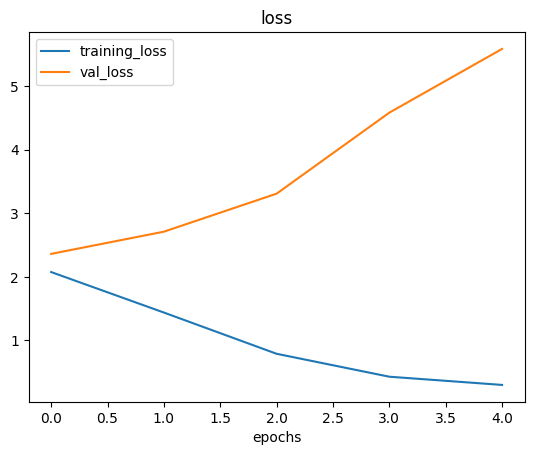

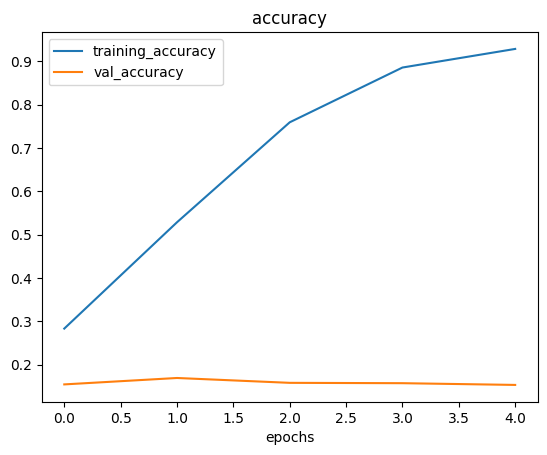

In [22]:
#Check out the model loss curve
plot_loss_curves(history = history_8)

what do these loss curves tell us:
it seems our model is **overfitting** the training set quite badly it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset


###6.Adjust the model hyperparameters (to beat baseline/reduce)

Due to its performance on training data it is clear model is learning something However it is not generalising unseen data

So let's try and fix overfitting

* **Get more data** -
* **Simplify the model** - reduce layers or reduce hidden units
* **Data augmentation** - Manipulate the training data
in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverage the patterns another model has learned similar data on your own dataset


In [11]:
#Simplify the model first
model_8.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 881,132 (3.36 MB)

 Trainable params: 293,710 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 587,422 (2.24 MB)

In [12]:
#Remove 2 convolutional layers
model_9 = Sequential([
    Conv2D(10,3 , activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics =["accuracy"]

)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#Fit the model
history_9 = model_9.fit(
    train_data,
    epochs=5,
    validation_data = test_data
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


235/235 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.1097 - loss: 49.7768 - val_accuracy: 0.1196 - val_loss: 2.3212
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.2163 - loss: 2.1724 - val_accuracy: 0.1356 - val_loss: 2.3750
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.3697 - loss: 1.8224 - val_accuracy: 0.1464 - val_loss: 2.5280
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.5480 - loss: 1.3586 - val_accuracy: 0.1412 - val_loss: 2.8229
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.6853 - loss: 0.9832 - val_accuracy: 0.1368 - val_loss: 3.5020


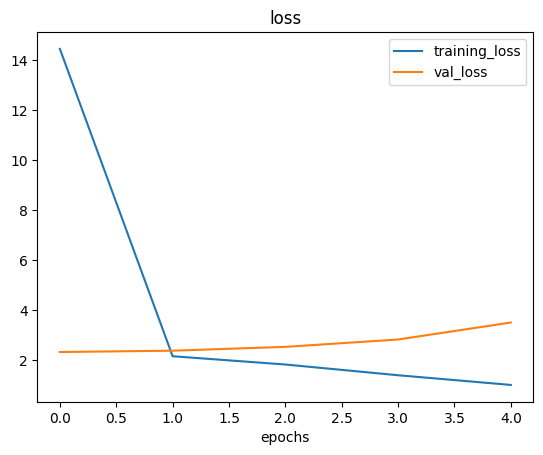

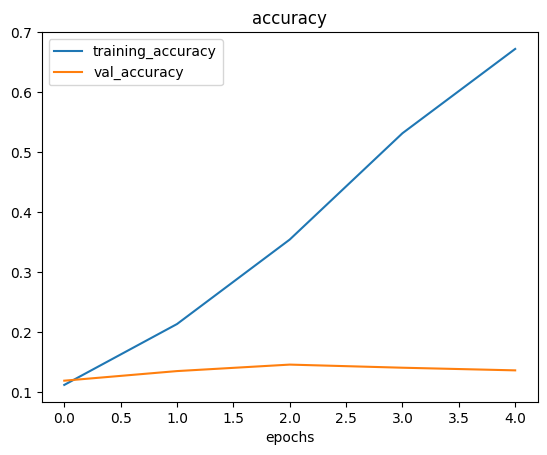

In [24]:
#Check out the loss curve
plot_loss_curves(history_9)

###Trying to reduce overfit by data augmentation

1. We want to reduce overfitting(get the train and validation loss curves)
2. Improve validation accuracy


In [18]:
train_datagen_augmented = ImageDataGenerator(rescale =1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range=0.2,
                                             zoom_range= 0.2,
                                             horizontal_flip =True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (224,224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [14]:
#another model with aigmented data
model_10 =tf.keras.models.clone_model(model_8)

#Compile the clone model(using same setup as previous model)

model_10.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


In [15]:
model_10.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293,710 (1.12 MB)

 Trainable params: 293,710 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#Fit the model
history_10 = model_10.fit(
    train_data_augmented,
    epochs=5,
    validation_data = test_data
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1707 - loss: 2.2383

/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


235/235 ━━━━━━━━━━━━━━━━━━━━ 573s 2s/step - accuracy: 0.1708 - loss: 2.2379 - val_accuracy: 0.2400 - val_loss: 158.8558
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 653s 3s/step - accuracy: 0.2752 - loss: 2.0396 - val_accuracy: 0.1912 - val_loss: 263.9109
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.3081 - loss: 1.9723 - val_accuracy: 0.1884 - val_loss: 265.0821
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - accuracy: 0.3278 - loss: 1.9472 - val_accuracy: 0.2180 - val_loss: 187.1283
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 598s 3s/step - accuracy: 0.3489 - loss: 1.8970 - val_accuracy: 0.1948 - val_loss: 158.8413


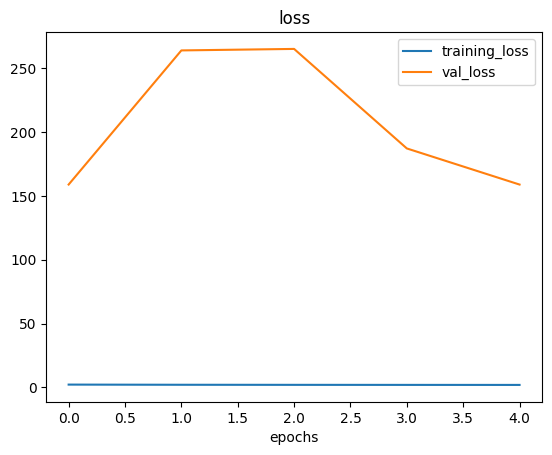

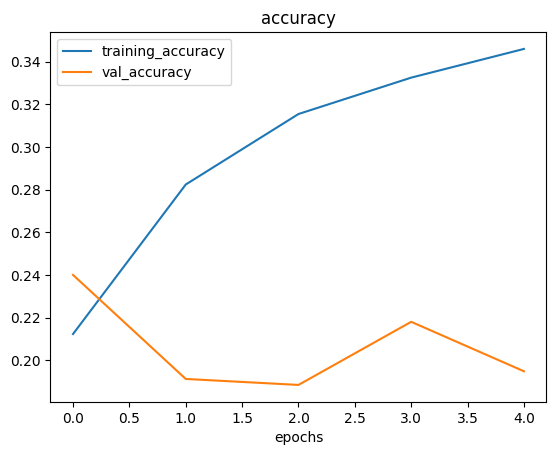

In [26]:
plot_loss_curves(history_10)

###7.Repeat until satisfied

Trying to bring our loss curves together and trying to improve the validation accuracy

How?

Trying lots of experiments, namely-
* Restructuring our models architecture(increasing layers/ hidden units)
* Adjust the learning rate
* try different methods of data augmentation (adjust hyper parameter in our data augmentation)
* Training for longer(10 epochs)
* **Transfer learning**

### Making a prediction withour trained model


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

In [ ]:
#Reconfig pred and plot
def pred_and_plot(model, filename, class_names= class_names):
  #Imports an image located at filename, makes a prediction with model and plots the image with predicted class as the title

  #Import the target image and preprocesses it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #Add in logic for multiclass
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]


  #Get the predicted class


  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)

In [ ]:
#Make a prediction using model_10
pred_and_plot(model=model_10,
              filename = "03-pizza-dad.jpeg")

Looks like our model doesn't perform well in custom images but this is because it only achieved very low accuracy.

###Save model


In [ ]:
model_10.save("saved_trained_model_10")